In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
path = "/content/drive/MyDrive/Colab/The Global Dataset 14 Apr 2020 (2).csv"
humantrafficking = pd.read_csv(path)
import numpy as np
import seaborn as sns
import plotly
import os
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go


!pip install matplotlib

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (6,55,57) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
print(humantrafficking.shape)

(48801, 64)


# **DATA CLEANING**


In [4]:
humantrafficking.head()

,By using this data you agree to the Terms of Use: https://www.ctdatacollaborative.org/terms-use,yearOfRegistration,Datasource,gender,ageBroad,majorityStatus,majorityStatusAtExploit,majorityEntry,citizenship,meansOfControlDebtBondage,meansOfControlTakesEarnings,meansOfControlRestrictsFinancialAccess,meansOfControlThreats,meansOfControlPsychologicalAbuse,meansOfControlPhysicalAbuse,meansOfControlSexualAbuse,meansOfControlFalsePromises,meansOfControlPsychoactiveSubstances,meansOfControlRestrictsMovement,meansOfControlRestrictsMedicalCare,meansOfControlExcessiveWorkingHours,meansOfControlUsesChildren,meansOfControlThreatOfLawEnforcement,meansOfControlWithholdsNecessities,meansOfControlWithholdsDocuments,meansOfControlOther,meansOfControlNotSpecified,meansOfControlConcatenated,isForcedLabour,isSexualExploit,isOtherExploit,isSexAndLabour,isForcedMarriage,isForcedMilitary,isOrganRemoval,isSlaveryAndPractices,typeOfExploitConcatenated,typeOfLabourAgriculture,typeOfLabourAquafarming,typeOfLabourBegging,typeOfLabourConstruction,typeOfLabourDomesticWork,typeOfLabourHospitality,typeOfLabourIllicitActivities,typeOfLabourManufacturing,typeOfLabourMiningOrDrilling,typeOfLabourPeddling,typeOfLabourTransportation,typeOfLabourOther,typeOfLabourNotSpecified,typeOfLabourConcatenated,typeOfSexProstitution,typeOfSexPornography,typeOfSexRemoteInteractiveServices,typeOfSexPrivateSexualServices,typeOfSexConcatenated,isAbduction,RecruiterRelationship,CountryOfExploitation,recruiterRelationIntimatePartner,recruiterRelationFriend,recruiterRelationFamily,recruiterRelationOther,recruiterRelationUnknown
0,NaN,2002,Case Management,Female,18--20,Adult,-99,-99,CO,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,1,-99,0,1,0,0,-99,0,0,-99,Sexual exploitation,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,0,0,0,0,1
1,NaN,2002,Case Management,Female,18--20,Adult,-99,-99,CO,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,1,-99,0,1,0,0,-99,0,0,-99,Sexual exploitation,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,0,0,0,0,1
2,NaN,2002,Case Management,Female,18--20,Adult,-99,-99,CO,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,1,-99,0,1,0,0,-99,0,0,-99,Sexual exploitation,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,0,0,0,0,1
3,NaN,2002,Case Management,Female,18--20,Adult,-99,-99,CO,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,1,-99,0,1,0,0,-99,0,0,-99,Sexual exploitation,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,0,0,0,0,1
4,NaN,2002,Case Management,Female,18--20,Adult,-99,-99,CO,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,1,-99,0,1,0,0,-99,0,0,-99,Sexual exploitation,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,0,0,0,0,1


# **Removing the first column as it is not a part of our dataset.**


In [5]:
humantrafficking = humantrafficking.drop('By using this data you agree to the Terms of Use: https://www.ctdatacollaborative.org/terms-use', 1)

In [6]:
humantrafficking.head()

,yearOfRegistration,Datasource,gender,ageBroad,majorityStatus,majorityStatusAtExploit,majorityEntry,citizenship,meansOfControlDebtBondage,meansOfControlTakesEarnings,meansOfControlRestrictsFinancialAccess,meansOfControlThreats,meansOfControlPsychologicalAbuse,meansOfControlPhysicalAbuse,meansOfControlSexualAbuse,meansOfControlFalsePromises,meansOfControlPsychoactiveSubstances,meansOfControlRestrictsMovement,meansOfControlRestrictsMedicalCare,meansOfControlExcessiveWorkingHours,meansOfControlUsesChildren,meansOfControlThreatOfLawEnforcement,meansOfControlWithholdsNecessities,meansOfControlWithholdsDocuments,meansOfControlOther,meansOfControlNotSpecified,meansOfControlConcatenated,isForcedLabour,isSexualExploit,isOtherExploit,isSexAndLabour,isForcedMarriage,isForcedMilitary,isOrganRemoval,isSlaveryAndPractices,typeOfExploitConcatenated,typeOfLabourAgriculture,typeOfLabourAquafarming,typeOfLabourBegging,typeOfLabourConstruction,typeOfLabourDomesticWork,typeOfLabourHospitality,typeOfLabourIllicitActivities,typeOfLabourManufacturing,typeOfLabourMiningOrDrilling,typeOfLabourPeddling,typeOfLabourTransportation,typeOfLabourOther,typeOfLabourNotSpecified,typeOfLabourConcatenated,typeOfSexProstitution,typeOfSexPornography,typeOfSexRemoteInteractiveServices,typeOfSexPrivateSexualServices,typeOfSexConcatenated,isAbduction,RecruiterRelationship,CountryOfExploitation,recruiterRelationIntimatePartner,recruiterRelationFriend,recruiterRelationFamily,recruiterRelationOther,recruiterRelationUnknown
0,2002,Case Management,Female,18--20,Adult,-99,-99,CO,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,1,-99,0,1,0,0,-99,0,0,-99,Sexual exploitation,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,0,0,0,0,1
1,2002,Case Management,Female,18--20,Adult,-99,-99,CO,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,1,-99,0,1,0,0,-99,0,0,-99,Sexual exploitation,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,0,0,0,0,1
2,2002,Case Management,Female,18--20,Adult,-99,-99,CO,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,1,-99,0,1,0,0,-99,0,0,-99,Sexual exploitation,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,0,0,0,0,1
3,2002,Case Management,Female,18--20,Adult,-99,-99,CO,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,1,-99,0,1,0,0,-99,0,0,-99,Sexual exploitation,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,0,0,0,0,1
4,2002,Case Management,Female,18--20,Adult,-99,-99,CO,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,1,-99,0,1,0,0,-99,0,0,-99,Sexual exploitation,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,0,0,0,0,1


# **Lets look at our Age Group column**


In [7]:
humantrafficking['ageBroad'].unique()

array(['18--20', '21--23', '24--26', '27--29', '30--38', '9--17', '-99',
       '0--8', '39--47', '48+'], dtype=object)

In [8]:
humantrafficking[humantrafficking['ageBroad']=='-99'].shape

(12362, 63)

In [9]:
humantrafficking["ageBroad"].replace({"-99": "Unknown"}, inplace=True)

Replacing '-99' in age group with 'Unkown'. We are doing this primarily due the follwing reasons:
*  There are 12362 records under 'ageBroad' listed as -99 or missing, which is almost 1/4th of total number of records in our dataset.
*   Ignoring such a large chunk of victim data in our analysis could lead to incorrect analysis.
*  By putting 'Unknown' we also not speculating any particular age group for the missing data as that would also be incorect.













# **Lets look at the Year of Registration column**

In [10]:
humantrafficking[humantrafficking['yearOfRegistration']==2019].shape

(28, 63)

In [11]:
humantrafficking['yearOfRegistration'].value_counts()

2016    16399
2017     6508
2018     5818
2015     4276
2014     3000
2013     1832
2005     1455
2006     1423
2007     1417
2012     1367
2011     1340
2002     1026
2010      943
2008      802
2009      587
2003      357
2004      223
2019       28
Name: yearOfRegistration, dtype: int64

As we can see we do not have sufficient data for the year 2019. Hence, we will be removing those records from the scope of our analysis

In [12]:
humantrafficking = humantrafficking[humantrafficking['yearOfRegistration']!=2019]

In [13]:
humantrafficking.shape

(48773, 63)

# **Lets look at the Citizenship and Country of Exploitation columns**

In [14]:
humantrafficking['citizenship'].sort_values().value_counts()

PH     11365
00      8858
UA      7761
MD      5901
US      3636
KH      1979
ID      1971
BY      1463
MM      1250
RO       655
GH       544
KG       437
BG       342
HT       339
-99      278
UZ       261
VN       170
GW       145
LA       126
CO       124
NG       108
AF        97
MG        94
LK        85
SL        81
SN        70
UG        70
TH        55
KZ        54
CD        53
ML        45
TJ        43
BF        33
KE        32
NE        31
CI        31
NP        27
TM        26
CN        23
AL        22
MX        19
BO        18
GN        15
ER        13
KR        12
BD        11
Name: citizenship, dtype: int64

In [15]:
humantrafficking['CountryOfExploitation'].sort_values().value_counts()

US     12512
-99    10175
UA      5399
MD      4504
RU      2738
PH      1988
ID      1777
KH      1000
MY       930
00       844
GH       544
AE       504
BY       400
TH       391
SN       370
BG       356
HT       339
PL       326
SA       278
RO       259
RS       248
QA       239
KZ       222
KW       209
TR       197
MK       194
UZ       193
BA       127
UG       123
JP       111
JO       108
OM        94
MG        94
TT        85
AF        83
SL        81
CN        79
LB        73
TJ        54
IN        46
SY        41
CZ        38
SG        37
ZA        36
TW        33
HK        31
BD        26
TM        26
AT        24
IT        24
BH        22
AL        22
MU        20
AR        18
DK        17
VN        16
EG        13
EC        13
CY        11
LY        11
Name: CountryOfExploitation, dtype: int64

In both the columns, '00' is neither a country nor a missing value. It indicates that the details regarding the country was not known when the case was registered for the victim. Therefore, we will replace '00' with 'Not Known' for sake of clarity of our audience.

In [16]:
humantrafficking['citizenship'].replace({'00': 'Not Known'}, inplace=True)

In [17]:
humantrafficking['citizenship'].unique()

array(['CO', 'MD', 'RO', 'UA', 'BY', 'GH', 'AL', 'BG', 'UZ', 'ID', 'TJ',
       'CD', 'ML', 'GW', 'CI', 'SN', 'SL', 'KG', 'GN', 'KH', 'LA', 'KZ',
       'TM', 'BF', 'NE', 'HT', 'LK', 'BO', 'MM', 'AF', 'UG', 'ER', 'NG',
       'NP', 'PH', 'BD', 'Not Known', 'US', '-99', 'TH', 'KR', 'VN', 'KE',
       'CN', 'MX', 'MG'], dtype=object)

In [18]:
humantrafficking['CountryOfExploitation'].replace({'00': 'Not Known'}, inplace=True)

In [19]:
humantrafficking['CountryOfExploitation'].unique()

array(['-99', 'RS', 'BA', 'MK', 'RU', 'MD', 'AE', 'CY', 'GH', 'AL', 'BG',
       'IT', 'RO', 'TR', 'UZ', 'MY', 'TJ', 'CZ', 'PL', 'ID', 'UG', 'UA',
       'AT', 'SN', 'SL', 'KZ', 'TH', 'EC', 'TM', 'Not Known', 'HT', 'JO',
       'AR', 'BY', 'AF', 'SY', 'QA', 'SA', 'SG', 'OM', 'TW', 'BH', 'TT',
       'ZA', 'EG', 'LB', 'DK', 'US', 'JP', 'KW', 'PH', 'MU', 'KH', 'CN',
       'VN', 'LY', 'HK', 'MG', 'IN', 'BD'], dtype=object)

We can also observe that there's missing data in both columns indicated as '-99'.
We can safely remove the records where we have missing data in both 'citizenship' (which is country of origin) and 'country of exploitation' as they don't add any value to our geographical analysis.

In [20]:
humantrafficking = humantrafficking[(humantrafficking['citizenship'] != '-99')]

In [21]:
humantrafficking['citizenship'].unique()

array(['CO', 'MD', 'RO', 'UA', 'BY', 'GH', 'AL', 'BG', 'UZ', 'ID', 'TJ',
       'CD', 'ML', 'GW', 'CI', 'SN', 'SL', 'KG', 'GN', 'KH', 'LA', 'KZ',
       'TM', 'BF', 'NE', 'HT', 'LK', 'BO', 'MM', 'AF', 'UG', 'ER', 'NG',
       'NP', 'PH', 'BD', 'Not Known', 'US', 'TH', 'KR', 'VN', 'KE', 'CN',
       'MX', 'MG'], dtype=object)

In [22]:
humantrafficking['CountryOfExploitation'].replace('-99', 'NaN', inplace=True)

In [23]:
humantrafficking['CountryOfExploitation'].unique()

array(['NaN', 'RS', 'BA', 'MK', 'RU', 'MD', 'AE', 'CY', 'GH', 'AL', 'BG',
       'IT', 'RO', 'TR', 'UZ', 'MY', 'TJ', 'CZ', 'PL', 'ID', 'UG', 'UA',
       'AT', 'SN', 'SL', 'KZ', 'TH', 'EC', 'TM', 'Not Known', 'HT', 'JO',
       'AR', 'BY', 'AF', 'SY', 'QA', 'SA', 'SG', 'OM', 'TW', 'BH', 'TT',
       'ZA', 'EG', 'LB', 'DK', 'US', 'JP', 'KW', 'PH', 'MU', 'CN', 'VN',
       'LY', 'HK', 'KH', 'MG', 'BD'], dtype=object)

In [24]:
print(humantrafficking.shape)

(48495, 63)


# **Adding a newly calculated conditional column for Victim Group based on Age group & Gender**

In [25]:
for ind, row in humantrafficking.iterrows():
  if (humantrafficking.loc[ind, 'ageBroad'] == '0--8') or (humantrafficking.loc[ind, 'ageBroad'] == '9--17'):
      if humantrafficking.loc[ind, 'gender'] == 'Male':
        humantrafficking.loc[ind,'Victim Group'] = 'Boys (Minor Males)'
      else:
        humantrafficking.loc[ind,'Victim Group'] = 'Girls (Minor Females)'
  elif humantrafficking.loc[ind, 'ageBroad'] == 'Unknown':
     humantrafficking.loc[ind,'Victim Group'] = 'Unknown'
  else:
      if humantrafficking.loc[ind, 'gender'] == 'Male':
        humantrafficking.loc[ind,'Victim Group'] = 'Men (Adult Males)'
      else:
        humantrafficking.loc[ind,'Victim Group'] = 'Women (Adult Females)'


In [26]:
humantrafficking['Victim Group'].value_counts()

Women (Adult Females)    19085
Unknown                  12187
Girls (Minor Females)     7492
Men (Adult Males)         7139
Boys (Minor Males)        2592
Name: Victim Group, dtype: int64

# **Replace all -99 with NaN**

In [27]:
humantrafficking=humantrafficking.replace('-99','NaN')


In [28]:
humantrafficking=humantrafficking.replace(-99,np.NaN)

In [29]:
humantrafficking.head()

,yearOfRegistration,Datasource,gender,ageBroad,majorityStatus,majorityStatusAtExploit,majorityEntry,citizenship,meansOfControlDebtBondage,meansOfControlTakesEarnings,meansOfControlRestrictsFinancialAccess,meansOfControlThreats,meansOfControlPsychologicalAbuse,meansOfControlPhysicalAbuse,meansOfControlSexualAbuse,meansOfControlFalsePromises,meansOfControlPsychoactiveSubstances,meansOfControlRestrictsMovement,meansOfControlRestrictsMedicalCare,meansOfControlExcessiveWorkingHours,meansOfControlUsesChildren,meansOfControlThreatOfLawEnforcement,meansOfControlWithholdsNecessities,meansOfControlWithholdsDocuments,meansOfControlOther,meansOfControlNotSpecified,meansOfControlConcatenated,isForcedLabour,isSexualExploit,isOtherExploit,isSexAndLabour,isForcedMarriage,isForcedMilitary,isOrganRemoval,isSlaveryAndPractices,typeOfExploitConcatenated,typeOfLabourAgriculture,typeOfLabourAquafarming,typeOfLabourBegging,typeOfLabourConstruction,typeOfLabourDomesticWork,typeOfLabourHospitality,typeOfLabourIllicitActivities,typeOfLabourManufacturing,typeOfLabourMiningOrDrilling,typeOfLabourPeddling,typeOfLabourTransportation,typeOfLabourOther,typeOfLabourNotSpecified,typeOfLabourConcatenated,typeOfSexProstitution,typeOfSexPornography,typeOfSexRemoteInteractiveServices,typeOfSexPrivateSexualServices,typeOfSexConcatenated,isAbduction,RecruiterRelationship,CountryOfExploitation,recruiterRelationIntimatePartner,recruiterRelationFriend,recruiterRelationFamily,recruiterRelationOther,recruiterRelationUnknown,Victim Group
0,2002,Case Management,Female,18--20,Adult,NaN,NaN,CO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,0.0,1.0,0.0,0.0,NaN,0.0,0.0,NaN,Sexual exploitation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,Women (Adult Females)
1,2002,Case Management,Female,18--20,Adult,NaN,NaN,CO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,0.0,1.0,0.0,0.0,NaN,0.0,0.0,NaN,Sexual exploitation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,Women (Adult Females)
2,2002,Case Management,Female,18--20,Adult,NaN,NaN,CO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,0.0,1.0,0.0,0.0,NaN,0.0,0.0,NaN,Sexual exploitation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,Women (Adult Females)
3,2002,Case Management,Female,18--20,Adult,NaN,NaN,CO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,0.0,1.0,0.0,0.0,NaN,0.0,0.0,NaN,Sexual exploitation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,Women (Adult Females)
4,2002,Case Management,Female,18--20,Adult,NaN,NaN,CO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,0.0,1.0,0.0,0.0,NaN,0.0,0.0,NaN,Sexual exploitation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,Women (Adult Females)


In [30]:
humantrafficking['CountryOfExploitation'].unique()

array(['NaN', 'RS', 'BA', 'MK', 'RU', 'MD', 'AE', 'CY', 'GH', 'AL', 'BG',
       'IT', 'RO', 'TR', 'UZ', 'MY', 'TJ', 'CZ', 'PL', 'ID', 'UG', 'UA',
       'AT', 'SN', 'SL', 'KZ', 'TH', 'EC', 'TM', 'Not Known', 'HT', 'JO',
       'AR', 'BY', 'AF', 'SY', 'QA', 'SA', 'SG', 'OM', 'TW', 'BH', 'TT',
       'ZA', 'EG', 'LB', 'DK', 'US', 'JP', 'KW', 'PH', 'MU', 'CN', 'VN',
       'LY', 'HK', 'KH', 'MG', 'BD'], dtype=object)

Replace all'-99' with 'NaN' across the dataframe. We are doing this primarily due the follwing reasons:

*    In the dataframe, we have only '0' and '1' which represent True and False respectively 
*  Making sure the '-99' values do not interfere with the arithmatic data analysis



# **Analysis Questions: Based on Victim Demographics**

Based on our dataframe, we would like to clarify the following:
 

1.   All columns that starts with 'is' is refering to the type of exploitation. For example, isForcedLabour. isSexualExploit etc.
2.   All columns that starts with 'meansOfControl' is refering to the means of control used on the victim to commit the crime. For example, meansOfControlWithholdsDocuments, meansOfControlSexualAbuse etc.
3.   All columns that starts with 'typeOfLabour' is refering to the 
further sub-type of labour exploitation faced by the victim. For example, typeOfLabourAgriculture, typeOfLabourAquafarming etc.
4.   All columns that starts with 'typeOfSex' is refering to the further sub-type of sexual exploitation faced by the victim. For example, typeOfSexProstitution, typeOfSexPornography etc.
5.   All columns that starts with 'recruiterRelation' is refering to the relationship the expoliter/recruiter had with the victim. For example, recruiterRelationFriend, recruiterRelationIntimatePartner etc.
6.   These columns capture True/False or Yes/No value using numerical 1 & 0. 1 indicates True or Yes, whereas 0 indicates False or No.



  


**Question 1: What are the most prevalent types of exploitations in each victim group?**

In [31]:
#Lets group our humantrafficking dataframe based on the 'Victim Group' using the sum function

ht = humantrafficking.groupby(['Victim Group']).sum().reset_index()
ht

,Victim Group,yearOfRegistration,meansOfControlDebtBondage,meansOfControlTakesEarnings,meansOfControlRestrictsFinancialAccess,meansOfControlThreats,meansOfControlPsychologicalAbuse,meansOfControlPhysicalAbuse,meansOfControlSexualAbuse,meansOfControlFalsePromises,meansOfControlPsychoactiveSubstances,meansOfControlRestrictsMovement,meansOfControlRestrictsMedicalCare,meansOfControlExcessiveWorkingHours,meansOfControlUsesChildren,meansOfControlThreatOfLawEnforcement,meansOfControlWithholdsNecessities,meansOfControlWithholdsDocuments,meansOfControlOther,meansOfControlNotSpecified,isForcedLabour,isSexualExploit,isOtherExploit,isSexAndLabour,isForcedMarriage,isForcedMilitary,isOrganRemoval,isSlaveryAndPractices,typeOfLabourAgriculture,typeOfLabourAquafarming,typeOfLabourBegging,typeOfLabourConstruction,typeOfLabourDomesticWork,typeOfLabourHospitality,typeOfLabourIllicitActivities,typeOfLabourManufacturing,typeOfLabourMiningOrDrilling,typeOfLabourPeddling,typeOfLabourTransportation,typeOfLabourOther,typeOfLabourNotSpecified,typeOfSexProstitution,typeOfSexPornography,typeOfSexRemoteInteractiveServices,typeOfSexPrivateSexualServices,isAbduction,recruiterRelationIntimatePartner,recruiterRelationFriend,recruiterRelationFamily,recruiterRelationOther,recruiterRelationUnknown
0,Boys (Minor Males),5215830,18.0,12.0,0.0,55.0,125.0,87.0,43.0,92.0,29.0,59.0,12.0,30.0,3.0,0.0,23.0,0.0,39.0,2253.0,711.0,392.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,83.0,21.0,46.0,13.0,0.0,0.0,0.0,72.0,0.0,76.0,340.0,30.0,13.0,0.0,0.0,0.0,6.0,31.0,97.0,53.0,2430.0
1,Girls (Minor Females),15096680,70.0,135.0,8.0,578.0,983.0,595.0,423.0,139.0,685.0,648.0,16.0,49.0,4.0,22.0,136.0,14.0,319.0,4983.0,580.0,4829.0,12.0,32.0,11.0,0.0,0.0,0.0,0.0,0.0,66.0,0.0,71.0,0.0,0.0,0.0,0.0,0.0,0.0,28.0,247.0,1922.0,133.0,0.0,19.0,26.0,351.0,227.0,633.0,383.0,6022.0
2,Men (Adult Males),14377187,434.0,1320.0,0.0,975.0,1171.0,563.0,3.0,1305.0,29.0,1123.0,689.0,1271.0,0.0,390.0,548.0,1052.0,67.0,5659.0,3679.0,72.0,17.0,0.0,0.0,0.0,0.0,0.0,19.0,94.0,0.0,1222.0,0.0,0.0,0.0,130.0,0.0,0.0,0.0,0.0,320.0,0.0,0.0,0.0,0.0,0.0,0.0,447.0,21.0,1353.0,5704.0
3,Unknown,24569381,27.0,0.0,0.0,10.0,3.0,11.0,6.0,92.0,0.0,27.0,0.0,0.0,0.0,0.0,0.0,32.0,83.0,492.0,2436.0,902.0,6907.0,0.0,89.0,0.0,0.0,359.0,0.0,13.0,0.0,0.0,2115.0,41.0,0.0,112.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,967.0,716.0,1594.0,8898.0
4,Women (Adult Females),38415884,722.0,1309.0,108.0,2320.0,2563.0,2376.0,1069.0,1127.0,1539.0,2558.0,566.0,779.0,113.0,367.0,662.0,977.0,1357.0,13189.0,2320.0,9819.0,58.0,46.0,68.0,0.0,0.0,0.0,133.0,0.0,0.0,11.0,466.0,28.0,0.0,211.0,0.0,0.0,0.0,25.0,264.0,2434.0,0.0,0.0,24.0,13.0,1267.0,424.0,412.0,1097.0,15921.0


In [32]:
#Dropping 'yearOfRegistration' as it doesn't makes sense to group and sum 'year of registration'
ht.drop('yearOfRegistration', 1, inplace=True)
ht

,Victim Group,meansOfControlDebtBondage,meansOfControlTakesEarnings,meansOfControlRestrictsFinancialAccess,meansOfControlThreats,meansOfControlPsychologicalAbuse,meansOfControlPhysicalAbuse,meansOfControlSexualAbuse,meansOfControlFalsePromises,meansOfControlPsychoactiveSubstances,meansOfControlRestrictsMovement,meansOfControlRestrictsMedicalCare,meansOfControlExcessiveWorkingHours,meansOfControlUsesChildren,meansOfControlThreatOfLawEnforcement,meansOfControlWithholdsNecessities,meansOfControlWithholdsDocuments,meansOfControlOther,meansOfControlNotSpecified,isForcedLabour,isSexualExploit,isOtherExploit,isSexAndLabour,isForcedMarriage,isForcedMilitary,isOrganRemoval,isSlaveryAndPractices,typeOfLabourAgriculture,typeOfLabourAquafarming,typeOfLabourBegging,typeOfLabourConstruction,typeOfLabourDomesticWork,typeOfLabourHospitality,typeOfLabourIllicitActivities,typeOfLabourManufacturing,typeOfLabourMiningOrDrilling,typeOfLabourPeddling,typeOfLabourTransportation,typeOfLabourOther,typeOfLabourNotSpecified,typeOfSexProstitution,typeOfSexPornography,typeOfSexRemoteInteractiveServices,typeOfSexPrivateSexualServices,isAbduction,recruiterRelationIntimatePartner,recruiterRelationFriend,recruiterRelationFamily,recruiterRelationOther,recruiterRelationUnknown
0,Boys (Minor Males),18.0,12.0,0.0,55.0,125.0,87.0,43.0,92.0,29.0,59.0,12.0,30.0,3.0,0.0,23.0,0.0,39.0,2253.0,711.0,392.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,83.0,21.0,46.0,13.0,0.0,0.0,0.0,72.0,0.0,76.0,340.0,30.0,13.0,0.0,0.0,0.0,6.0,31.0,97.0,53.0,2430.0
1,Girls (Minor Females),70.0,135.0,8.0,578.0,983.0,595.0,423.0,139.0,685.0,648.0,16.0,49.0,4.0,22.0,136.0,14.0,319.0,4983.0,580.0,4829.0,12.0,32.0,11.0,0.0,0.0,0.0,0.0,0.0,66.0,0.0,71.0,0.0,0.0,0.0,0.0,0.0,0.0,28.0,247.0,1922.0,133.0,0.0,19.0,26.0,351.0,227.0,633.0,383.0,6022.0
2,Men (Adult Males),434.0,1320.0,0.0,975.0,1171.0,563.0,3.0,1305.0,29.0,1123.0,689.0,1271.0,0.0,390.0,548.0,1052.0,67.0,5659.0,3679.0,72.0,17.0,0.0,0.0,0.0,0.0,0.0,19.0,94.0,0.0,1222.0,0.0,0.0,0.0,130.0,0.0,0.0,0.0,0.0,320.0,0.0,0.0,0.0,0.0,0.0,0.0,447.0,21.0,1353.0,5704.0
3,Unknown,27.0,0.0,0.0,10.0,3.0,11.0,6.0,92.0,0.0,27.0,0.0,0.0,0.0,0.0,0.0,32.0,83.0,492.0,2436.0,902.0,6907.0,0.0,89.0,0.0,0.0,359.0,0.0,13.0,0.0,0.0,2115.0,41.0,0.0,112.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,967.0,716.0,1594.0,8898.0
4,Women (Adult Females),722.0,1309.0,108.0,2320.0,2563.0,2376.0,1069.0,1127.0,1539.0,2558.0,566.0,779.0,113.0,367.0,662.0,977.0,1357.0,13189.0,2320.0,9819.0,58.0,46.0,68.0,0.0,0.0,0.0,133.0,0.0,0.0,11.0,466.0,28.0,0.0,211.0,0.0,0.0,0.0,25.0,264.0,2434.0,0.0,0.0,24.0,13.0,1267.0,424.0,412.0,1097.0,15921.0


In [33]:
#Setting 'Victim Group' as the index for the dataframe
ht = ht.set_index('Victim Group')
ht

,meansOfControlDebtBondage,meansOfControlTakesEarnings,meansOfControlRestrictsFinancialAccess,meansOfControlThreats,meansOfControlPsychologicalAbuse,meansOfControlPhysicalAbuse,meansOfControlSexualAbuse,meansOfControlFalsePromises,meansOfControlPsychoactiveSubstances,meansOfControlRestrictsMovement,meansOfControlRestrictsMedicalCare,meansOfControlExcessiveWorkingHours,meansOfControlUsesChildren,meansOfControlThreatOfLawEnforcement,meansOfControlWithholdsNecessities,meansOfControlWithholdsDocuments,meansOfControlOther,meansOfControlNotSpecified,isForcedLabour,isSexualExploit,isOtherExploit,isSexAndLabour,isForcedMarriage,isForcedMilitary,isOrganRemoval,isSlaveryAndPractices,typeOfLabourAgriculture,typeOfLabourAquafarming,typeOfLabourBegging,typeOfLabourConstruction,typeOfLabourDomesticWork,typeOfLabourHospitality,typeOfLabourIllicitActivities,typeOfLabourManufacturing,typeOfLabourMiningOrDrilling,typeOfLabourPeddling,typeOfLabourTransportation,typeOfLabourOther,typeOfLabourNotSpecified,typeOfSexProstitution,typeOfSexPornography,typeOfSexRemoteInteractiveServices,typeOfSexPrivateSexualServices,isAbduction,recruiterRelationIntimatePartner,recruiterRelationFriend,recruiterRelationFamily,recruiterRelationOther,recruiterRelationUnknown
Victim Group,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Boys (Minor Males),18.0,12.0,0.0,55.0,125.0,87.0,43.0,92.0,29.0,59.0,12.0,30.0,3.0,0.0,23.0,0.0,39.0,2253.0,711.0,392.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,83.0,21.0,46.0,13.0,0.0,0.0,0.0,72.0,0.0,76.0,340.0,30.0,13.0,0.0,0.0,0.0,6.0,31.0,97.0,53.0,2430.0
Girls (Minor Females),70.0,135.0,8.0,578.0,983.0,595.0,423.0,139.0,685.0,648.0,16.0,49.0,4.0,22.0,136.0,14.0,319.0,4983.0,580.0,4829.0,12.0,32.0,11.0,0.0,0.0,0.0,0.0,0.0,66.0,0.0,71.0,0.0,0.0,0.0,0.0,0.0,0.0,28.0,247.0,1922.0,133.0,0.0,19.0,26.0,351.0,227.0,633.0,383.0,6022.0
Men (Adult Males),434.0,1320.0,0.0,975.0,1171.0,563.0,3.0,1305.0,29.0,1123.0,689.0,1271.0,0.0,390.0,548.0,1052.0,67.0,5659.0,3679.0,72.0,17.0,0.0,0.0,0.0,0.0,0.0,19.0,94.0,0.0,1222.0,0.0,0.0,0.0,130.0,0.0,0.0,0.0,0.0,320.0,0.0,0.0,0.0,0.0,0.0,0.0,447.0,21.0,1353.0,5704.0
Unknown,27.0,0.0,0.0,10.0,3.0,11.0,6.0,92.0,0.0,27.0,0.0,0.0,0.0,0.0,0.0,32.0,83.0,492.0,2436.0,902.0,6907.0,0.0,89.0,0.0,0.0,359.0,0.0,13.0,0.0,0.0,2115.0,41.0,0.0,112.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,967.0,716.0,1594.0,8898.0
Women (Adult Females),722.0,1309.0,108.0,2320.0,2563.0,2376.0,1069.0,1127.0,1539.0,2558.0,566.0,779.0,113.0,367.0,662.0,977.0,1357.0,13189.0,2320.0,9819.0,58.0,46.0,68.0,0.0,0.0,0.0,133.0,0.0,0.0,11.0,466.0,28.0,0.0,211.0,0.0,0.0,0.0,25.0,264.0,2434.0,0.0,0.0,24.0,13.0,1267.0,424.0,412.0,1097.0,15921.0


In [34]:
#Tranposing our dataframe for easier analysis
htt = ht.transpose()
htt

Victim Group,Boys (Minor Males),Girls (Minor Females),Men (Adult Males),Unknown,Women (Adult Females)
meansOfControlDebtBondage,18.0,70.0,434.0,27.0,722.0
meansOfControlTakesEarnings,12.0,135.0,1320.0,0.0,1309.0
meansOfControlRestrictsFinancialAccess,0.0,8.0,0.0,0.0,108.0
meansOfControlThreats,55.0,578.0,975.0,10.0,2320.0
meansOfControlPsychologicalAbuse,125.0,983.0,1171.0,3.0,2563.0
meansOfControlPhysicalAbuse,87.0,595.0,563.0,11.0,2376.0
meansOfControlSexualAbuse,43.0,423.0,3.0,6.0,1069.0
meansOfControlFalsePromises,92.0,139.0,1305.0,92.0,1127.0
meansOfControlPsychoactiveSubstances,29.0,685.0,29.0,0.0,1539.0
meansOfControlRestrictsMovement,59.0,648.0,1123.0,27.0,2558.0


In [35]:
#Subsetting 'htt' dataframe to include rows related to 'type of exploitation'
htt_exploit = htt.iloc[18:26]
htt_exploit

Victim Group,Boys (Minor Males),Girls (Minor Females),Men (Adult Males),Unknown,Women (Adult Females)
isForcedLabour,711.0,580.0,3679.0,2436.0,2320.0
isSexualExploit,392.0,4829.0,72.0,902.0,9819.0
isOtherExploit,13.0,12.0,17.0,6907.0,58.0
isSexAndLabour,0.0,32.0,0.0,0.0,46.0
isForcedMarriage,0.0,11.0,0.0,89.0,68.0
isForcedMilitary,0.0,0.0,0.0,0.0,0.0
isOrganRemoval,0.0,0.0,0.0,0.0,0.0
isSlaveryAndPractices,0.0,0.0,0.0,359.0,0.0


In [36]:
#Updating the Index Names
htt_exploit.index = ['Forced Labour', 'Sexual Exploitation', 'Other Exploitation', 'Sex And Labour', 'Forced Marriage', 'Forced Military', 'Organ Removal', 'Slavery And Practices']
htt_exploit

Victim Group,Boys (Minor Males),Girls (Minor Females),Men (Adult Males),Unknown,Women (Adult Females)
Forced Labour,711.0,580.0,3679.0,2436.0,2320.0
Sexual Exploitation,392.0,4829.0,72.0,902.0,9819.0
Other Exploitation,13.0,12.0,17.0,6907.0,58.0
Sex And Labour,0.0,32.0,0.0,0.0,46.0
Forced Marriage,0.0,11.0,0.0,89.0,68.0
Forced Military,0.0,0.0,0.0,0.0,0.0
Organ Removal,0.0,0.0,0.0,0.0,0.0
Slavery And Practices,0.0,0.0,0.0,359.0,0.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8501380a10>,
      dtype=object)

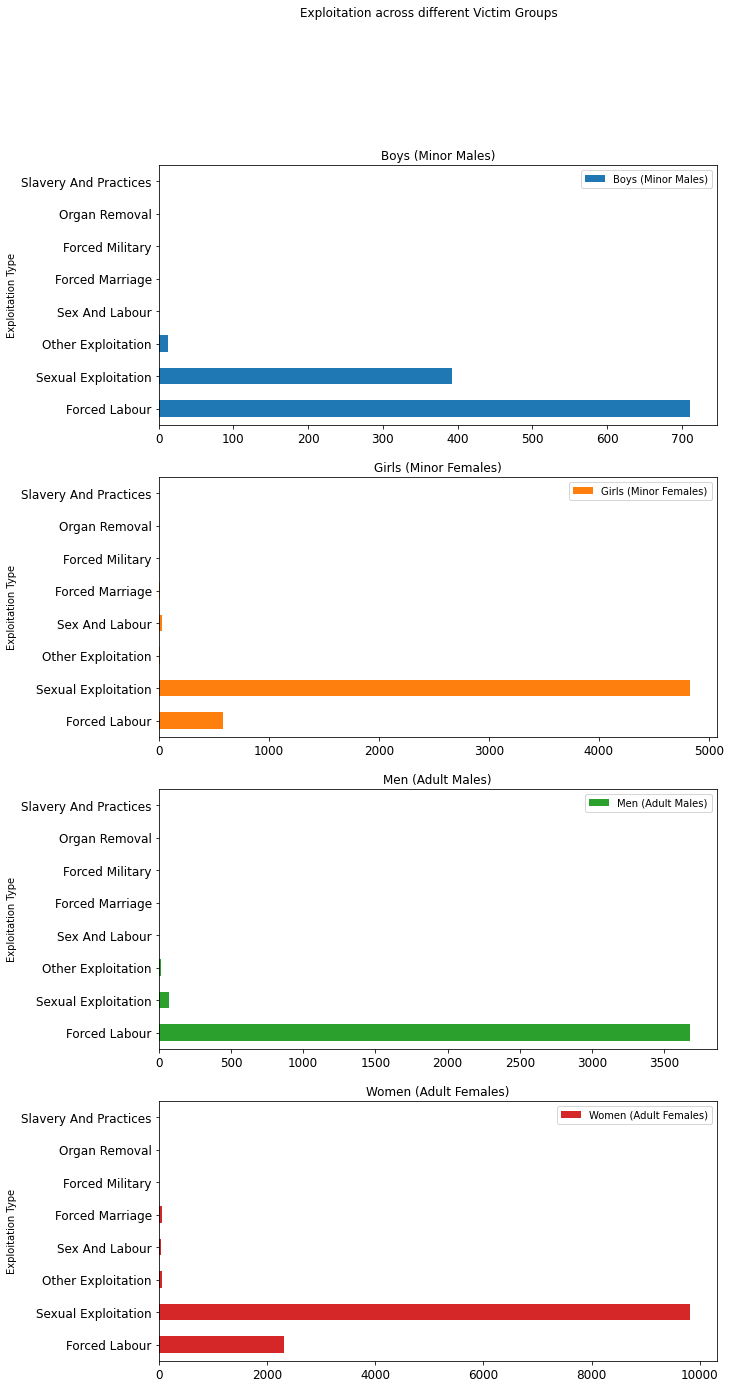

In [37]:
#Plotting Exploiatation Types across different Victim Groups

htt_exploit.plot.barh(y=['Boys (Minor Males)','Girls (Minor Females)', 'Men (Adult Males)', 'Women (Adult Females)'],
                      subplots=True, sharex=False, figsize=(10, 22), fontsize=12,
                      xlabel="Exploitation Type", ylabel="Count",
                      title = "Exploitation across different Victim Groups")

From the above plot it is clear that:
*   Boys (Minor Males) were most subjected to Forced Labour, followed by Sexual Exploitation.
*   Girls (Minor Females) were most subjected to Sexual Exploitation.
*   Men (Adult Males) were most subjected to Forced Labour.
*   Women (Adult Females) were most subjected to Sexual Exploitation.






**Question 2: What are the means of control used for such exploitations in each victim group?**

In [38]:
#Lets continue to use our transposed humantrafficing dataframe for the sake our analysis
htt

Victim Group,Boys (Minor Males),Girls (Minor Females),Men (Adult Males),Unknown,Women (Adult Females)
meansOfControlDebtBondage,18.0,70.0,434.0,27.0,722.0
meansOfControlTakesEarnings,12.0,135.0,1320.0,0.0,1309.0
meansOfControlRestrictsFinancialAccess,0.0,8.0,0.0,0.0,108.0
meansOfControlThreats,55.0,578.0,975.0,10.0,2320.0
meansOfControlPsychologicalAbuse,125.0,983.0,1171.0,3.0,2563.0
meansOfControlPhysicalAbuse,87.0,595.0,563.0,11.0,2376.0
meansOfControlSexualAbuse,43.0,423.0,3.0,6.0,1069.0
meansOfControlFalsePromises,92.0,139.0,1305.0,92.0,1127.0
meansOfControlPsychoactiveSubstances,29.0,685.0,29.0,0.0,1539.0
meansOfControlRestrictsMovement,59.0,648.0,1123.0,27.0,2558.0


In [39]:
#Subsetting 'htt' dataframe to include rows related to 'means of control'
htt_moc = htt.iloc[0:18]
htt_moc

Victim Group,Boys (Minor Males),Girls (Minor Females),Men (Adult Males),Unknown,Women (Adult Females)
meansOfControlDebtBondage,18.0,70.0,434.0,27.0,722.0
meansOfControlTakesEarnings,12.0,135.0,1320.0,0.0,1309.0
meansOfControlRestrictsFinancialAccess,0.0,8.0,0.0,0.0,108.0
meansOfControlThreats,55.0,578.0,975.0,10.0,2320.0
meansOfControlPsychologicalAbuse,125.0,983.0,1171.0,3.0,2563.0
meansOfControlPhysicalAbuse,87.0,595.0,563.0,11.0,2376.0
meansOfControlSexualAbuse,43.0,423.0,3.0,6.0,1069.0
meansOfControlFalsePromises,92.0,139.0,1305.0,92.0,1127.0
meansOfControlPsychoactiveSubstances,29.0,685.0,29.0,0.0,1539.0
meansOfControlRestrictsMovement,59.0,648.0,1123.0,27.0,2558.0


If the means of control which is 'not specified' will not add any value to our analysis. Hence, we can safely disregard those cases.

In [40]:
#Removing 'meansOfControlNotSpecified' from our dataframe
htt_moc = htt.iloc[0:17]
htt_moc

Victim Group,Boys (Minor Males),Girls (Minor Females),Men (Adult Males),Unknown,Women (Adult Females)
meansOfControlDebtBondage,18.0,70.0,434.0,27.0,722.0
meansOfControlTakesEarnings,12.0,135.0,1320.0,0.0,1309.0
meansOfControlRestrictsFinancialAccess,0.0,8.0,0.0,0.0,108.0
meansOfControlThreats,55.0,578.0,975.0,10.0,2320.0
meansOfControlPsychologicalAbuse,125.0,983.0,1171.0,3.0,2563.0
meansOfControlPhysicalAbuse,87.0,595.0,563.0,11.0,2376.0
meansOfControlSexualAbuse,43.0,423.0,3.0,6.0,1069.0
meansOfControlFalsePromises,92.0,139.0,1305.0,92.0,1127.0
meansOfControlPsychoactiveSubstances,29.0,685.0,29.0,0.0,1539.0
meansOfControlRestrictsMovement,59.0,648.0,1123.0,27.0,2558.0


In [41]:
#Updating the Index Names
htt_moc.index = ['Debt Bondage','Takes Earnings','Restricts Financial Access','Threats','Psychological Abuse','Physical Abuse','Sexual Abuse','False Promises','Psychoactive Substances','Restricts Movement','Restricts Medical Care','Excessive Working Hours','Uses Children','Threat Of Law Enforcement','Withholds Necessities','Withholds Documents','Other']
htt_moc

Victim Group,Boys (Minor Males),Girls (Minor Females),Men (Adult Males),Unknown,Women (Adult Females)
Debt Bondage,18.0,70.0,434.0,27.0,722.0
Takes Earnings,12.0,135.0,1320.0,0.0,1309.0
Restricts Financial Access,0.0,8.0,0.0,0.0,108.0
Threats,55.0,578.0,975.0,10.0,2320.0
Psychological Abuse,125.0,983.0,1171.0,3.0,2563.0
Physical Abuse,87.0,595.0,563.0,11.0,2376.0
Sexual Abuse,43.0,423.0,3.0,6.0,1069.0
False Promises,92.0,139.0,1305.0,92.0,1127.0
Psychoactive Substances,29.0,685.0,29.0,0.0,1539.0
Restricts Movement,59.0,648.0,1123.0,27.0,2558.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f85013c5490>,
      dtype=object)

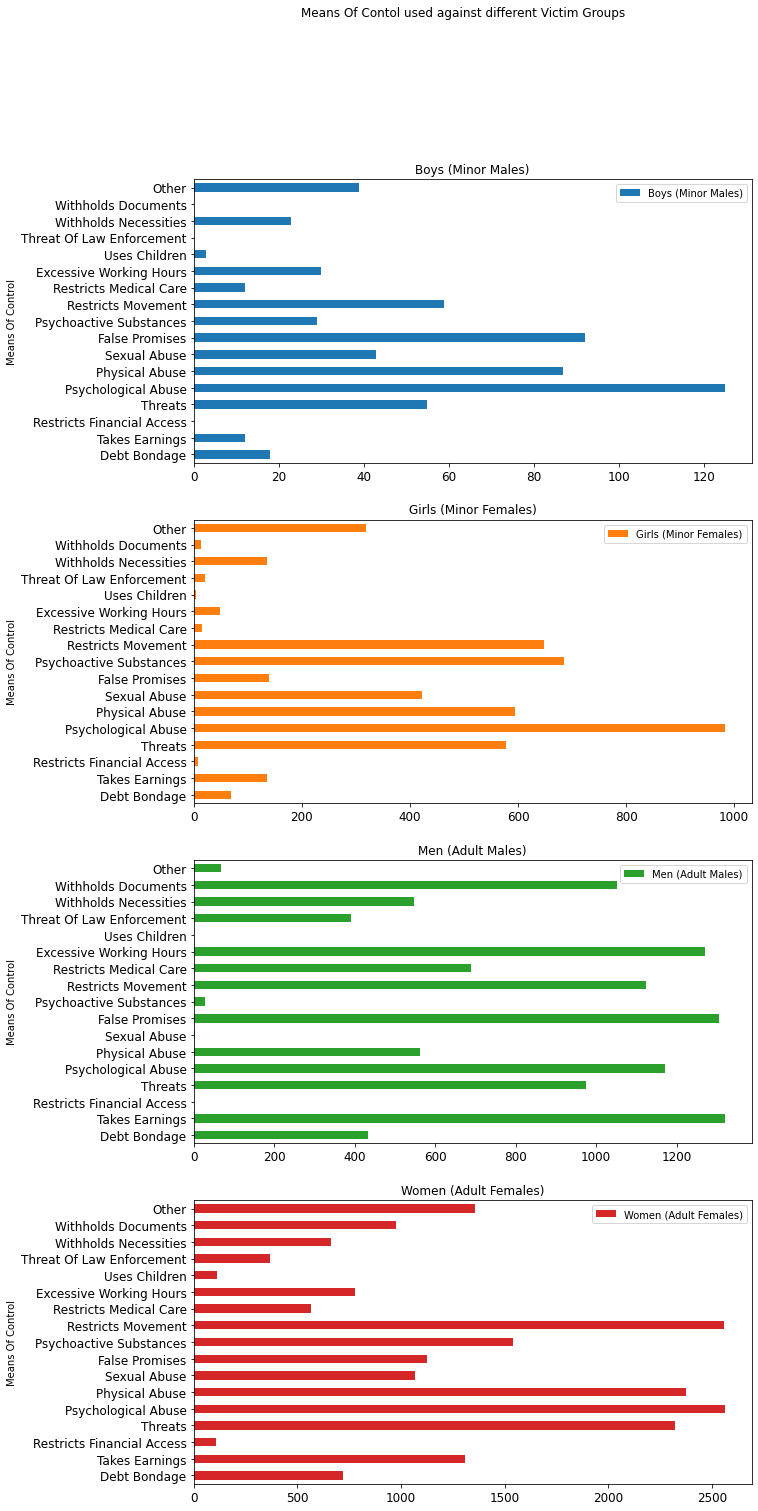

In [42]:
#Plotting 'Means Of Contol' used against different Victim Groups

htt_moc.plot.barh(y=['Boys (Minor Males)','Girls (Minor Females)', 'Men (Adult Males)', 'Women (Adult Females)'],
                      figsize=(10, 24), fontsize=12, subplots=True, sharex=False, 
                      xlabel="Means Of Control", ylabel="Count",
                      title = "Means Of Contol used against different Victim Groups")

It is clear from the above graph that:
*   For Boys (Minor Males), the most common means of control was Psychological Abuse, followed by False Promises & Sexual Abuse.
*   For Girls (Minor Females), the most common means of control was Psychological Abuse, followed by Psychoactive Substances & Restricted Movements.
*   For Men (Adult Males), the most common means of control was Taken Earnings, followed by False Promises & Excessive Working Hours.
*   For Women (Adult Females), the most common means of control was Psychological Abuse, followed by Restricted Movements & Physical Abuse.







**Question 3: What are the most common types of exploiter relationships with victim in each group?**

In [43]:
#Again, lets continue to use our transposed humantrafficing dataframe for the sake our analysis
htt

Victim Group,Boys (Minor Males),Girls (Minor Females),Men (Adult Males),Unknown,Women (Adult Females)
meansOfControlDebtBondage,18.0,70.0,434.0,27.0,722.0
meansOfControlTakesEarnings,12.0,135.0,1320.0,0.0,1309.0
meansOfControlRestrictsFinancialAccess,0.0,8.0,0.0,0.0,108.0
meansOfControlThreats,55.0,578.0,975.0,10.0,2320.0
meansOfControlPsychologicalAbuse,125.0,983.0,1171.0,3.0,2563.0
meansOfControlPhysicalAbuse,87.0,595.0,563.0,11.0,2376.0
meansOfControlSexualAbuse,43.0,423.0,3.0,6.0,1069.0
meansOfControlFalsePromises,92.0,139.0,1305.0,92.0,1127.0
meansOfControlPsychoactiveSubstances,29.0,685.0,29.0,0.0,1539.0
meansOfControlRestrictsMovement,59.0,648.0,1123.0,27.0,2558.0


In [44]:
#Subsetting 'htt' dataframe to include rows related to 'Recruiter Relation'
htt_rr = htt.iloc[44:49]
htt_rr

Victim Group,Boys (Minor Males),Girls (Minor Females),Men (Adult Males),Unknown,Women (Adult Females)
recruiterRelationIntimatePartner,6.0,351.0,0.0,1.0,1267.0
recruiterRelationFriend,31.0,227.0,447.0,967.0,424.0
recruiterRelationFamily,97.0,633.0,21.0,716.0,412.0
recruiterRelationOther,53.0,383.0,1353.0,1594.0,1097.0
recruiterRelationUnknown,2430.0,6022.0,5704.0,8898.0,15921.0


In [45]:
#Removing 'recruiterRelationUnknown' from our dataframe as it won't be adding any value to our analysis
htt_rr = htt.iloc[44:48]
htt_rr

Victim Group,Boys (Minor Males),Girls (Minor Females),Men (Adult Males),Unknown,Women (Adult Females)
recruiterRelationIntimatePartner,6.0,351.0,0.0,1.0,1267.0
recruiterRelationFriend,31.0,227.0,447.0,967.0,424.0
recruiterRelationFamily,97.0,633.0,21.0,716.0,412.0
recruiterRelationOther,53.0,383.0,1353.0,1594.0,1097.0


In [46]:
#Updating the Index Names
htt_rr.index = ['Intimate Partner','Friend','Family','Other']
htt_rr

Victim Group,Boys (Minor Males),Girls (Minor Females),Men (Adult Males),Unknown,Women (Adult Females)
Intimate Partner,6.0,351.0,0.0,1.0,1267.0
Friend,31.0,227.0,447.0,967.0,424.0
Family,97.0,633.0,21.0,716.0,412.0
Other,53.0,383.0,1353.0,1594.0,1097.0


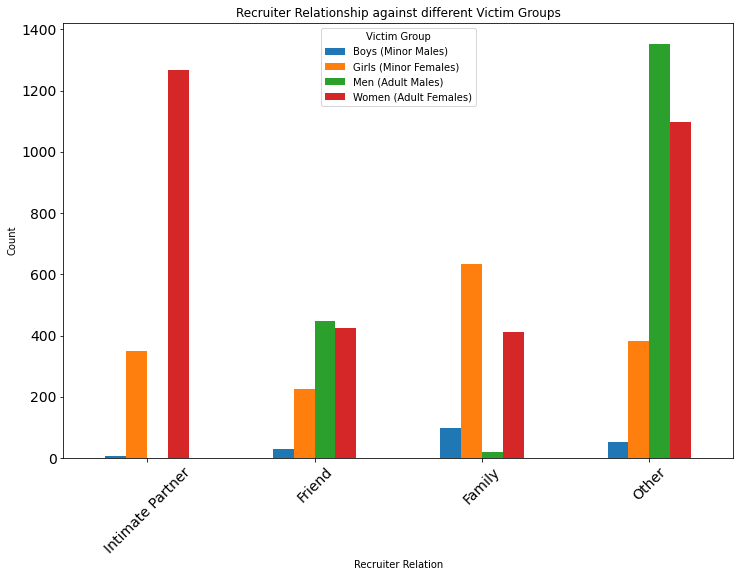

In [47]:
#Plotting 'Recruiter Relationship' against different Victim Groups

htt_rr.plot.bar(y=['Boys (Minor Males)','Girls (Minor Females)', 'Men (Adult Males)', 'Women (Adult Females)'],
                      figsize=(12, 8), fontsize=14, rot=45,
                      xlabel="Recruiter Relation", ylabel="Count",
                      title = "Recruiter Relationship against different Victim Groups")

From the above plot it is clear that:
*  Boys (Minor Males) are more often exploited by their Family Members.
*   Girls (Minor Females) are more often exploited by their Family Members.
*   Men (Adult Males) are more often exploied by Other acquaintances (outside family).
*   Women (Adult Females) are more often exploied by their Intimate Partners.



**Question 4: What are the most common types of forced labor & sexual exploitation carried out in each victim group?**

In [48]:
#Again, lets continue to use our transposed humantrafficing dataframe for the sake our analysis
htt

Victim Group,Boys (Minor Males),Girls (Minor Females),Men (Adult Males),Unknown,Women (Adult Females)
meansOfControlDebtBondage,18.0,70.0,434.0,27.0,722.0
meansOfControlTakesEarnings,12.0,135.0,1320.0,0.0,1309.0
meansOfControlRestrictsFinancialAccess,0.0,8.0,0.0,0.0,108.0
meansOfControlThreats,55.0,578.0,975.0,10.0,2320.0
meansOfControlPsychologicalAbuse,125.0,983.0,1171.0,3.0,2563.0
meansOfControlPhysicalAbuse,87.0,595.0,563.0,11.0,2376.0
meansOfControlSexualAbuse,43.0,423.0,3.0,6.0,1069.0
meansOfControlFalsePromises,92.0,139.0,1305.0,92.0,1127.0
meansOfControlPsychoactiveSubstances,29.0,685.0,29.0,0.0,1539.0
meansOfControlRestrictsMovement,59.0,648.0,1123.0,27.0,2558.0


In [49]:
#Subsetting 'htt' dataframe to include rows related to 'Type of Sexual Exploitation' and 'Type of Labour Exploitation'
htt_sl = htt.iloc[26:43]
htt_sl.drop('typeOfLabourNotSpecified', axis=0, inplace=True)     #If Labour type is Not Specified, we keep them out of our scope of analysis
htt_sl

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Victim Group,Boys (Minor Males),Girls (Minor Females),Men (Adult Males),Unknown,Women (Adult Females)
typeOfLabourAgriculture,0.0,0.0,19.0,0.0,133.0
typeOfLabourAquafarming,0.0,0.0,94.0,13.0,0.0
typeOfLabourBegging,83.0,66.0,0.0,0.0,0.0
typeOfLabourConstruction,21.0,0.0,1222.0,0.0,11.0
typeOfLabourDomesticWork,46.0,71.0,0.0,2115.0,466.0
typeOfLabourHospitality,13.0,0.0,0.0,41.0,28.0
typeOfLabourIllicitActivities,0.0,0.0,0.0,0.0,0.0
typeOfLabourManufacturing,0.0,0.0,130.0,112.0,211.0
typeOfLabourMiningOrDrilling,0.0,0.0,0.0,0.0,0.0
typeOfLabourPeddling,72.0,0.0,0.0,0.0,0.0


In [50]:
#Updating the Index Names
htt_sl.index = ['Labour: Agriculture','Labour: Aquafarming','Labour: Begging','Labour: Construction','Labour: Domestic Work','Labour: Hospitality','Labour: Illicit Activities', 'Labour: Manufacturing', 'Labour: Mining Or Drilling', 'Labour: Peddling', 'Labour: Transportation', 'Labour: Other', 'Sex: Prostitution', 'Sex: Pornography', 'Sex: Remote Interactive Services','Sex: Private Sexual Services']
htt_sl

Victim Group,Boys (Minor Males),Girls (Minor Females),Men (Adult Males),Unknown,Women (Adult Females)
Labour: Agriculture,0.0,0.0,19.0,0.0,133.0
Labour: Aquafarming,0.0,0.0,94.0,13.0,0.0
Labour: Begging,83.0,66.0,0.0,0.0,0.0
Labour: Construction,21.0,0.0,1222.0,0.0,11.0
Labour: Domestic Work,46.0,71.0,0.0,2115.0,466.0
Labour: Hospitality,13.0,0.0,0.0,41.0,28.0
Labour: Illicit Activities,0.0,0.0,0.0,0.0,0.0
Labour: Manufacturing,0.0,0.0,130.0,112.0,211.0
Labour: Mining Or Drilling,0.0,0.0,0.0,0.0,0.0
Labour: Peddling,72.0,0.0,0.0,0.0,0.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f84ff0a8550>,
      dtype=object)

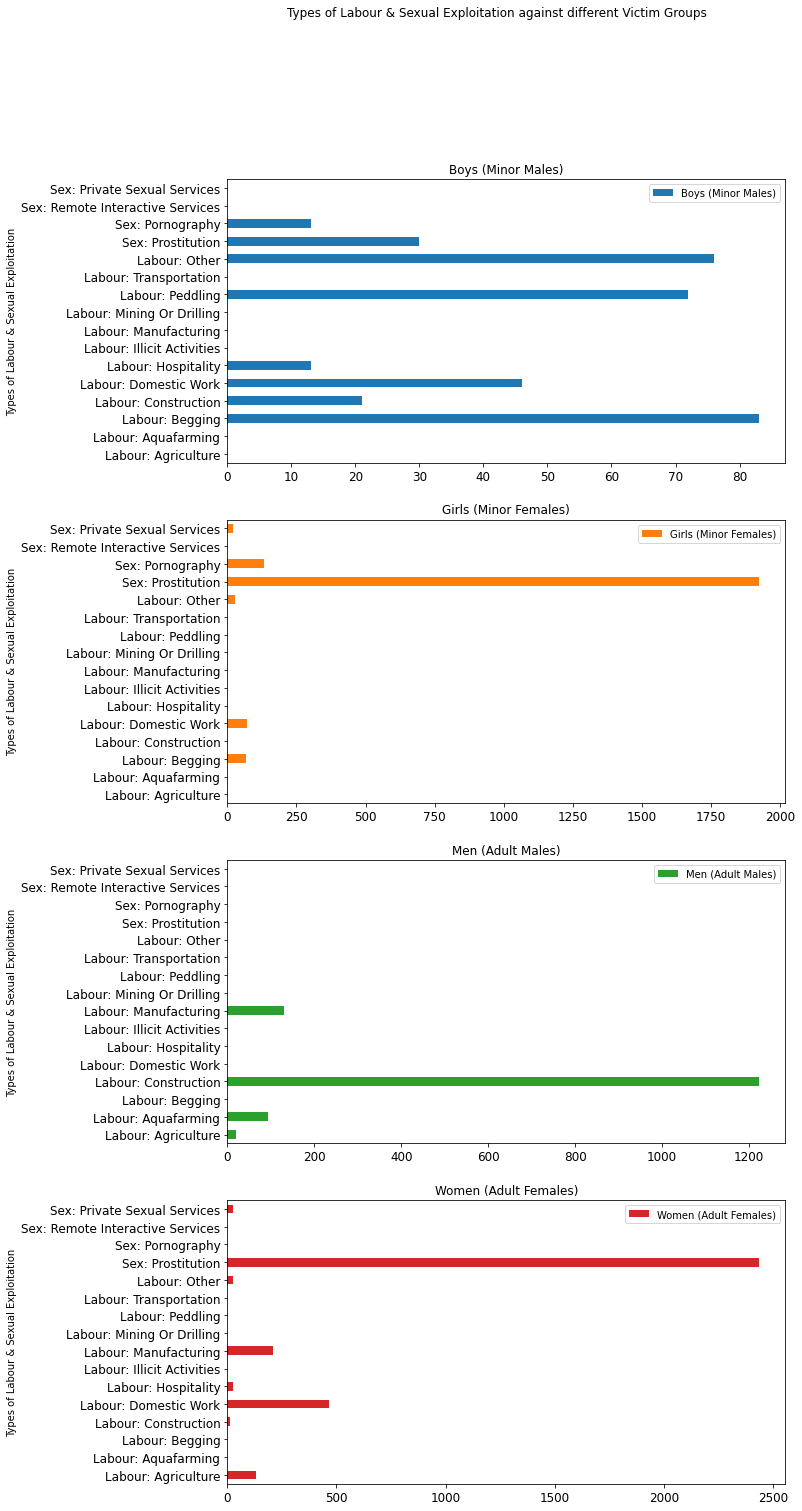

In [51]:
#Plotting 'Types of Labour & Sexual Exploitation' against different Victim Groups

htt_sl.plot.barh(y=['Boys (Minor Males)','Girls (Minor Females)', 'Men (Adult Males)', 'Women (Adult Females)'],
                      figsize=(10, 24), fontsize=12, subplots=True, sharex=False, 
                      xlabel="Types of Labour & Sexual Exploitation", ylabel="Count",
                      title = "Types of Labour & Sexual Exploitation against different Victim Groups")

From the above graph it is clear that:
*   Boys (Minor Males) are more exploited through Labour such as Begging and Other forms of Labour Exploitations (not listed here).
*   Girls (Minor Females) are more sexually exploited through Prostitution.
*   Men (Adult Males) are more exploited through Labour such as Construction.
*   Women (Adult Females) are more sexually exploited through Prostitution









# **Analysis Question: Based on Trend Analysis over time series**

**Question 1: What is the trend of exploitation numbers over the years?**

In [52]:
humantrafficking_year = humantrafficking.groupby(['gender','yearOfRegistration']).size().reset_index()
humantrafficking_year.rename(columns = {0:'Number of Trafficked Individuals'}, inplace=True)


fig = px.bar(humantrafficking_year, x = 'yearOfRegistration', y = 'Number of Trafficked Individuals', color="gender",barmode="group",title="Trend of exploitation over the years", labels={"yearOfRegistration":"Year"},color_discrete_sequence=px.colors.qualitative.Safe,template="none",
            )
fig.show()

As seen in the grouped bar graph above, it is evident that the number of trafficked individuals have seen arised over the years. Although, the year 2016 shows a large number of female individuals affected, all the other years from 2005 to 2018 exhibit a rise in the total number of individuals affected. It is apparent from the graph that the number of female individuals trafficked have always been more than the number of male individuals each year.

:**Question 2: What is the distribution of various age groups exploited over the years?**

In [53]:
humantrafficking1=humantrafficking[(humantrafficking['ageBroad']!='Unknown')]
humantrafficking_age = humantrafficking1.groupby(['ageBroad','yearOfRegistration']).size().reset_index()
humantrafficking_age.rename(columns = {0:'Number of Trafficked Individuals'}, inplace=True)


fig = px.bar(humantrafficking_age, x = 'yearOfRegistration', y = 'Number of Trafficked Individuals',labels={"yearOfRegistration":"Year"},facet_col='ageBroad',color_discrete_sequence=px.colors.qualitative.Set2,title="Various age group exploited over the years",barmode="stack", template="seaborn",
            category_orders = {'ageBroad': ['0--8', '9--17', '18--20', '21--23', '24--26', '27--29', '30--38', '39--47', '48+']})
fig.show()

Based on the classified age groups, it is discernible the age groups 9-17 and 30-38 have been targeted comparatively more than any other age groups. In this bar chart, to make the visualization more decipherable we have got rid of the 'Unknown' value. 

**Question 3: Which are the most common type of exploitations in the last four years?**

In [54]:
humantrafficking2=humantrafficking[(humantrafficking['typeOfExploitConcatenated']!='Other')]
humantrafficking_year_expl = humantrafficking2.groupby(['yearOfRegistration','typeOfExploitConcatenated']).size().reset_index()
humantrafficking_year_expl.rename(columns = {0:'Number of Trafficked Individuals'}, inplace=True)
humantrafficking_year_expl_sort= humantrafficking_year_expl.sort_values(by="Number of Trafficked Individuals",ascending=False)[:5]

fig = px.bar(humantrafficking_year_expl_sort, x = 'yearOfRegistration', y = 'Number of Trafficked Individuals', color="typeOfExploitConcatenated",color_discrete_sequence=px.colors.qualitative.Pastel, barmode="group",title="Most common type of exploitations in the last four years", labels={"yearOfRegistration":"Year"},template="none",text='Number of Trafficked Individuals'
            )
fig.show()



The above bar chart shows us sexual exploitation and forced labour are the most common type of exploitations that had occured in the last four years of our dataset around the world. It is clearly evident that the sexual exploitation has been the most common way in which individuals have been affected. 

**Question 4: People of which citizenship had been most affected in the last 5 years ?**

In [55]:
humantrafficking_year= humantrafficking.groupby(['citizenship','yearOfRegistration']).size().reset_index()
humantrafficking_year.rename(columns = {0:'Number of Trafficked Individuals'}, inplace=True)
humantrafficking_year_sort= humantrafficking_year.sort_values(by="Number of Trafficked Individuals",ascending=False)[:10]

fig = px.bar(humantrafficking_year_sort, x = 'yearOfRegistration', y = 'Number of Trafficked Individuals', color="citizenship",color_discrete_sequence=px.colors.qualitative.Set3, barmode="stack",title="Citzenship of vitctims most affected in last 5 years", labels={"yearOfRegistration":"Year"}, color_discrete_map={ "Male": "RebeccaPurple", "Female": "MediumPurple"},template="none",text='Number of Trafficked Individuals',    
            )
fig.show()

The bar chart represents the citizenship of the victims that have been most affected in the last five years with highest frequency. These countries are PH(Philippines), ID(Indonesia), US(United States), UA(Ukraine), MM(Myanmar) and KH(Cambodia). Amongst the known countries, it is clearly evident that Philippines has seen the largest number of individuals affected in the year 2016. However, in 2017 and 2018 the highest number of victims had been from the people who did not disclose their citizenship.

# **Analysis Question: Based on Geography**

**Question 1: Which are Top 10 most affected countries?**

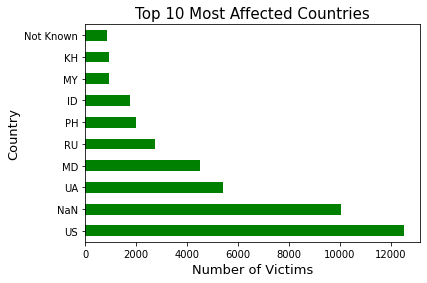

In [56]:
humantrafficking['CountryOfExploitation'].sort_values().value_counts(ascending= False).head(10).plot.barh(color= 'green')
plt.title('Top 10 Most Affected Countries',size=15)
plt.xlabel('Number of Victims',size=13)
plt.ylabel('Country',size=13)
plt.show()

In the above graph shows top 10 countries where there are maximum number of cases. Also, we can observe that United States has the highest number of human trafficking cases i.e. 12512. On the other hand, UAE, MD (Moldava), Russia, Phillipines, Indonesia, Myanmar has most of the cases of human trafficking.

**Question 2: What are the most prevalent types of exploitation in each of those countries?**

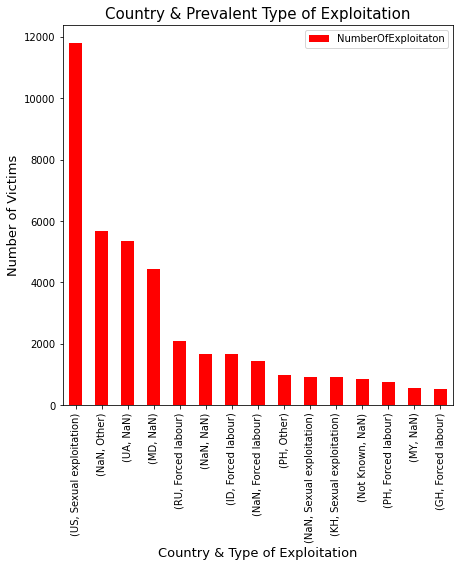

In [57]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
mm = humantrafficking.groupby('CountryOfExploitation')['typeOfExploitConcatenated']
mm1= mm.value_counts()
df5 = pd.DataFrame(mm1)
df7 = df5.rename(columns={'CountryOfExploitation': 'Country', 'typeOfExploitConcatenated': 'TypeOfExploitation','typeOfExploitConcatenated': 'NumberOfExploitaton'})
ff= df7.sort_values(by=['NumberOfExploitaton'],ascending=False).head(15)
ff.plot(kind='bar', stacked=True,color='red',title='Country & Prevalent Type of Exploitation',figsize=(7,7))
plt.xlabel('Country & Type of Exploitation',size=13)
plt.ylabel('Number of Victims',size=13)
plt.title('Country & Prevalent Type of Exploitation',size=15)
plt.show()

This picture shows what type of exploit is more prevalent in top 10 countries. Here, in USA, sexual exploitation has the highest number of cases as compared to forced labour. Furthermore, in Russia, forced labour has more cases when compared to other types of exploitation. Also, in Myanmar, Ghana and Phillipines we have more cases of forced labour rather than sexual exploitation.

**Question 3: To determine whether victims were mostly immigrants or citizen**

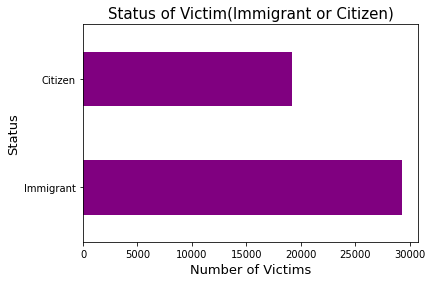

In [58]:
conditions = [
    (humantrafficking['citizenship'] == humantrafficking ['CountryOfExploitation']),
    (humantrafficking['citizenship'] != humantrafficking['CountryOfExploitation']),
    ]

values = ['Citizen', 'Immigrant']

humantrafficking['status'] = np.select(conditions, values)

humantrafficking['status'].sort_values().value_counts().plot.barh(color= 'purple')
plt.title('Status of Victim(Immigrant or Citizen)',size=15)
plt.xlabel('Number of Victims',size=13)
plt.ylabel('Status',size=13)
plt.show()


By looking at the above graph, one can undoubtedly say that most of the victims were migrated from different countries maybe by making false promises of job offer, by giving psychoactive substances, for prostitution, etc.